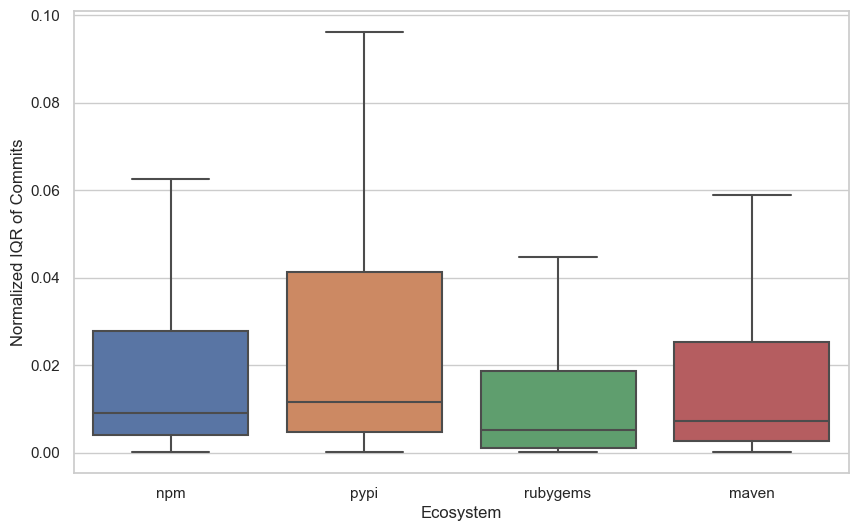

   Category        Q1        Q2        Q3       Min       Max
0       npm  0.003947  0.009091  0.027778  0.000190  0.129032
1      pypi  0.004619  0.011651  0.041311  0.000176  0.126316
2  rubygems  0.000936  0.005102  0.018648  0.000232  0.129771
3     maven  0.002700  0.007246  0.025318  0.000083  0.126984


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
import seaborn as sns

df = pd.read_csv('community_participation_records_new.csv')

df['IQR'] = df['q3'] - df['q1']
filtered_df = df[df['IQR'] > 0]
filtered_df = filtered_df.loc[:, ['ecosystem', 'Mean', 'Median', 'Range', 'IQR', 'q1', 'q2', 'q3', 'Std']]
filtered_df.groupby('ecosystem').describe()
averages = filtered_df.groupby('ecosystem').median()

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

scaler = MaxAbsScaler()
filtered_df["Normalised_IQR"] = scaler.fit_transform(filtered_df[["IQR"]])

df_cleaned = remove_outliers_iqr(filtered_df, "Normalised_IQR")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="ecosystem", y="IQR", data=df_cleaned, showfliers=False)

# plt.title("Comparative Analysis of Contributor Commit Variability Across Ecosystems")
plt.xlabel("Ecosystem")
plt.ylabel("Normalized IQR of Commits")
plt.show()

summary_data = []
for category in df_cleaned['ecosystem'].unique():
    subset = df_cleaned[df_cleaned['ecosystem'] == category]
    Q1 = subset["IQR"].quantile(0.25)
    Q2 = subset["IQR"].median()
    Q3 = subset["IQR"].quantile(0.75)
    min_value = subset["IQR"].min()
    max_value = subset["IQR"].max()
    
    summary_data.append({
        'Category': category,
        'Q1': Q1,
        'Q2': Q2,
        'Q3': Q3,
        'Min': min_value,
        'Max': max_value
    })

# Create a Pandas DataFrame from the summary data
summary_df = pd.DataFrame(summary_data)

# Display the summ
print(summary_df)
